Data-set source link: https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products
Problem Statement: Understanding insights from Customer Reviews - identify key product terms in the sentiments (Topic Modelling) - do sentiment analysis (classify sentiments) - understand product wise sentiments 

Given that we are dealing with Reviews, (Textual Data - Applications of NLP Techniques), following sub analysis - 
1. Entity Recognition (Named Entity Recognition), 2. Identifying Emerging Trends 3.Sentiment Analysis  4. Text Summarization 5. Topic Modelling 
and solutions deduced can be applied as universal attempt for exploring the data. 

We will restrict ourselves to Sentiment Analysis & Topic Modelling and explore advanced enhancements at later when we deploy real time sentiment monitors - probably by streaming data analysis using Databricks/ Apache Spark 

Further availability of labelled training data sets - especially pretrained word embeddings will helps us to employ Aspect Based Sentiment Analysis and Aspect Sentiment Triplet Extraction 

In [1]:
#Modelling 1 [Exploratory Analysis 1 and Topic Modelling using LDA]
#Importing required packages 
import os
import pandas as pd
import sklearn
from pandas import DataFrame,Series
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pylab as pl
from collections import Counter
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
%matplotlib inline

In [2]:
# Reading the initial data file as data frame  
df = pd.read_csv("1429_1.csv")
 

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#First-look at the data 
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
#Exploring each column 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

From the columns presented what we are really interested in working with to complete the sentiment analysis would be the reviews.text and reviews.rating. 

In [5]:
# the id has been chosen because under name there are more missing values. 
# from the description the ID represents a device sold by Amazon
data = df[["id","reviews.text","reviews.rating"]]


In [6]:
#Refined data glance 
data.head() 

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


In [7]:
#Exploratives in our Data
data.describe(include=["O"])

,id,reviews.text
count,34660,34659
unique,42,34659
top,AVphgVaX1cnluZ0-DR74,Do you like to read? If so this is an excellen...
freq,10966,1


We can see how there are a total of 42 products (from the ID) and for these 42 products, we will have a mix of reviews (positive, neutral or negative).

In [8]:
#Checking for null values via concise reports
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              34660 non-null  object 
 1   reviews.text    34659 non-null  object 
 2   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(2)
memory usage: 812.5+ KB


We can see how one review.text is missing, hence no analysis can be done on this sample. We can then remove it. Furthermore, there are 33 missing values for the ratings. Due to the low number of missing values in the rating column it is possible to substitute the NaN with the mean of the others or we could simply remove those samples. Since we would have many samples anyway they can be simply removed.

In [9]:
data = data.dropna()

Exploratory Data Analysis: 
  

In [10]:
#creating reviews text file for processing purposes 
rt = data['reviews.text']


To understand the average rating of the product , lets count ratings via ids- unique indexes, as products are not clearly defined with unique name identifier 
 

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


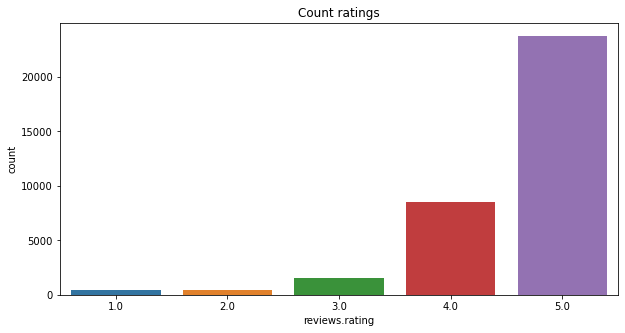

In [11]:
plt.figure(figsize=(10,5))
sbn.countplot(data['reviews.rating'])
plt.title('Count ratings')
plt.show()

In [12]:
data1 = data.groupby("id").mean().reset_index()

In [13]:
data1 = data1.sort_values(['reviews.rating']).reset_index()

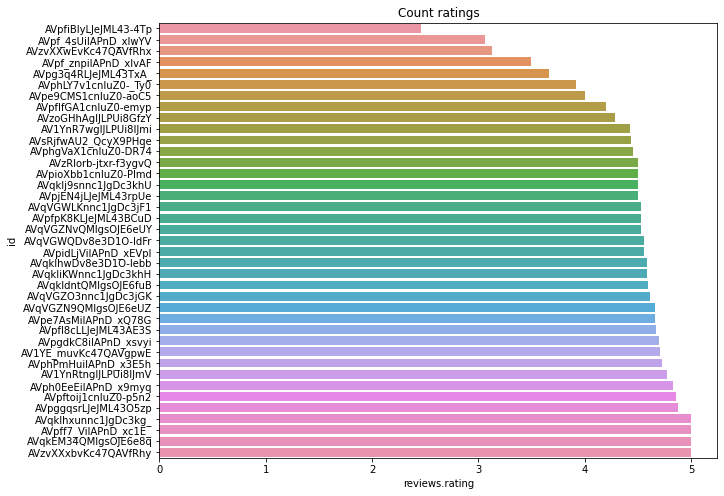

In [14]:
plt.figure(figsize=(10,8))
sbn.barplot(x=data1["reviews.rating"], y=data1["id"])
plt.title('Count ratings')
plt.show()

Frequencies for ratings are skewed for positive values at 4, 5 - evident from distribution plot - From these the data set is class imbalance in nature . 
Given the nature of the problem, we need to employ solution measures for class imbalance - sampling equal distribution of ratings by populating data or under/over sampling data with equal frequencies of ratings 

 

In [15]:
#Using the other two parts of the data set for analysis 
df2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df3 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [16]:
#Defining the datasets as data frames and keying in only required column vectors 
data2 = df2[["id","reviews.text","reviews.rating"]]
data3 = df3[["id","reviews.text","reviews.rating"]]

In [17]:
#Step to address the class imbalance provlem 
data2 = data2[data2["reviews.rating"]<=3]
data3 = data3[data3["reviews.rating"]<=3]

In [18]:
#Merging all the data 
frames = [data, data2, data3]
final = pd.concat(frames)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


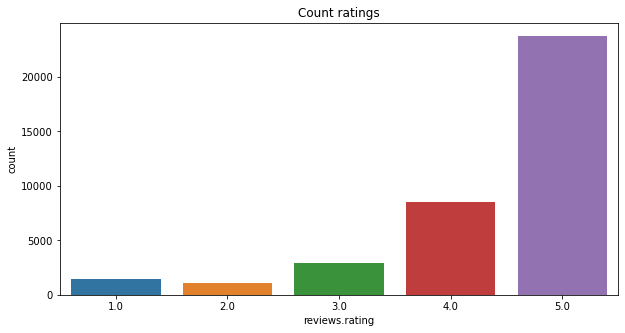

In [19]:
#Plot to check for frequency of rating for all the data 
plt.figure(figsize=(10,5))
sbn.countplot(final['reviews.rating'])
plt.title('Count ratings')
plt.show()

Even after merging the data, class-imbalance problem still exists. 

In [20]:
final.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


Problem statement Scope and Topic Modelling:  By the nature of unstructured Textual data, we want to derive insights about sentiments of consumers in terms of product features - authenticity of the product, quality of the product and from consumer standpoint, our support engine should be able to redflag fake reviews. Topic Modelling is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus, thus assisting in better decision making. 


In [21]:
#Importing required packages for Topic Modelling
import os
import nltk
from nltk import FreqDist
nltk.download('stopwords')
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import json
import re
import spacy

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Generating Text Corpus for all the products 


In [22]:
final.head()

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Bought as a gift and she loves it,5.0
2,AVqkIhwDv8e3D1O-lebb,"Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...",5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime conte...,4.0
4,AVqkIhwDv8e3D1O-lebb,"I bought this for my grand daughter when she comes over to visit. I set it up with her as the user, entered her age and name and now Amazon makes sure that she only accesses sites and content that...",5.0


In [23]:
# defining a function for frequent words 
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sbn.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()


C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


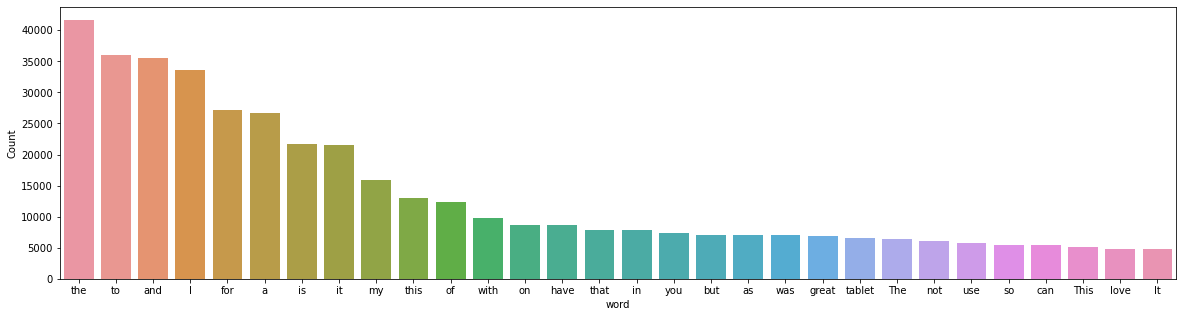

In [24]:
freq_words(final['reviews.text'])

In [25]:
# replace "n't" with " not"
final['reviews.text'] = final['reviews.text'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
final['reviews.text'] = final['reviews.text'].str.replace("[^a-zA-Z#]", " ")

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-41b081635bea>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  final['reviews.text'] = final['reviews.text'].str.replace("[^a-zA-Z#]", " ")


C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


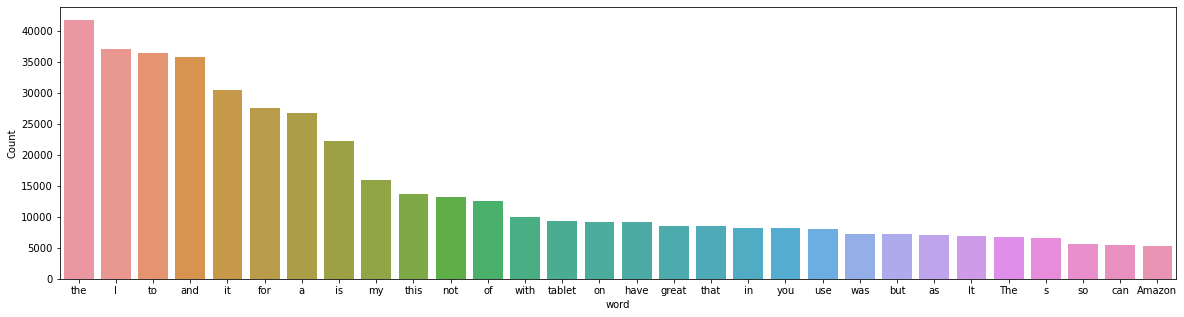

In [26]:
freq_words(final['reviews.text'])

In [27]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# remove short words (length < 3)
final['reviews.text'] = final['reviews.text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in final['reviews.text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


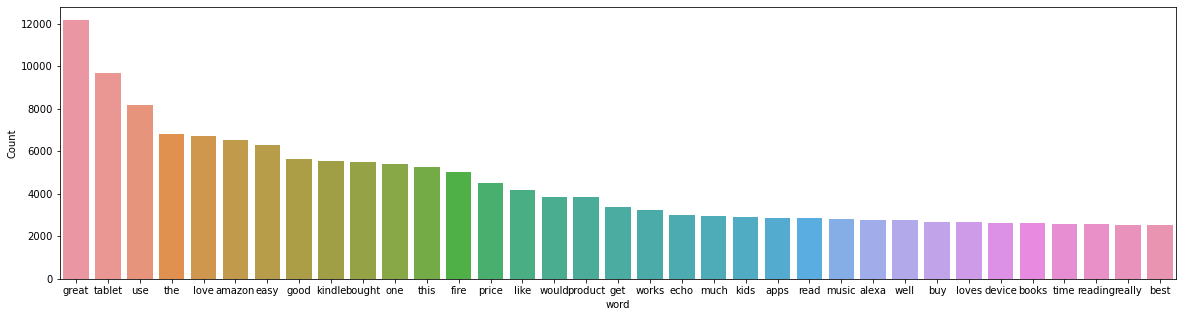

In [30]:
freq_words(reviews, 35)

In [31]:
import spacy

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
#Importing Spacy Packages with english language small models module 
import spacy
nlp = spacy.load("en_core_web_sm")

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
#Applying fast sentence segmentation without dependency parses and employing the senter component instead:
nlp = spacy.load("en_core_web_sm")
nlp.disable_pipe("parser")
nlp.disable_pipe("ner") 

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# lemmatization does morphological analysis of the words
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
#Tokenizing involves splitting sentences and words from the body of the text.
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['great', 'beginner', 'experienced', 'person', 'bought', 'gift', 'loves']


C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['great', 'beginner', 'experienced', 'person', 'bought', 'gift', 'loves']


C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7

In [37]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['beginner', 'person', 'gift']


In [38]:
print(reviews_2[1])
len(reviews_2[1])

['beginner', 'person', 'gift']


C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3

In [39]:
set(tokenized_reviews[1]) - set(reviews_2[1])

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'bought', 'experienced', 'great', 'loves'}

In [41]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
final['reviews'] = reviews_3

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


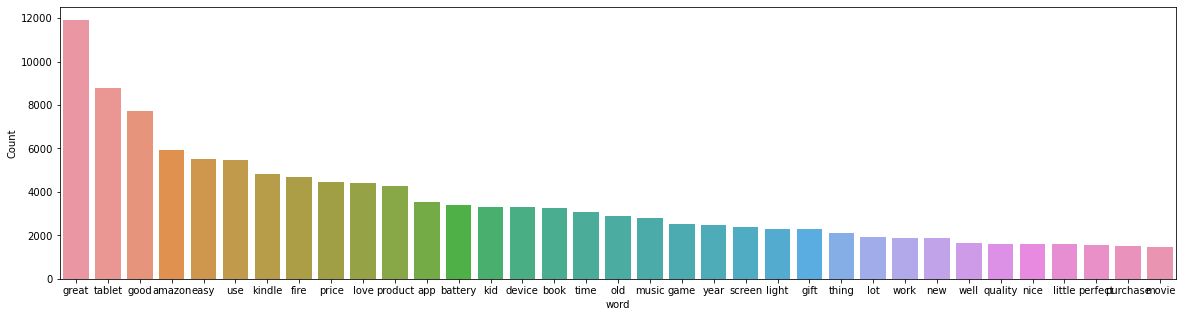

In [42]:
#After preprocessing final words appearing frequently in sentiments 
freq_words(final['reviews'], 35)

In [43]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews_2)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
print(dictionary)

Dictionary(8245 unique tokens: ['ability', 'child', 'content', 'control', 'disappointed']...)


C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8245 unique tokens identified as part of Dictionary Corpus 
Our next attempt is to build a model identifying important words and topics 
In order to model, we need to build A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents.(in our case : frequency of 8245 tokens in reviews)



In [45]:
# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There are many approaches for obtaining topics from a text such as – Term Frequency and Inverse Document Frequency. NonNegative Matrix Factorization techniques. Latent Dirichlet Allocation is the most popular topic modeling technique. In our problem setting, LDA assumes reviews  are produced from a mixture of topics. Those topics then generate words based on their probability distribution. Given a dataset of reviews, LDA backtracks and tries to figure out what topics would create those reviews

In [49]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
lda_model.print_topics()

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.055*"good" + 0.043*"great" + 0.024*"tablet" + 0.024*"quality" + 0.021*"price" + 0.020*"amazon" + 0.020*"speaker" + 0.019*"voice" + 0.018*"sound" + 0.017*"streaming"'),
 (1,
  '0.116*"battery" + 0.057*"time" + 0.032*"box" + 0.029*"last" + 0.020*"week" + 0.019*"long" + 0.017*"life" + 0.017*"month" + 0.015*"issue" + 0.015*"day"'),
 (2,
  '0.055*"app" + 0.035*"movie" + 0.032*"game" + 0.030*"great" + 0.025*"kid" + 0.022*"many" + 0.022*"love" + 0.022*"tablet" + 0.021*"thing" + 0.018*"fun"'),
 (3,
  '0.067*"amazon" + 0.036*"music" + 0.033*"device" + 0.027*"prime" + 0.025*"alexa" + 0.024*"product" + 0.024*"home" + 0.024*"remote" + 0.016*"question" + 0.016*"smart"'),
 (4,
  '0.133*"fire" + 0.064*"kindle" + 0.048*"love" + 0.027*"screen" + 0.025*"light" + 0.024*"amazon" + 0.023*"new" + 0.022*"money" + 0.021*"book" + 0.015*"worth"'),
 (5,
  '0.130*"use" + 0.115*"easy" + 0.106*"great" + 0.091*"good" + 0.087*"product" + 0.028*"price" + 0.028*"tablet" + 0.023*"gift" + 0.019*"purchase" + 0.0

In [53]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.208221 -0.023235       1        1  19.521118
2     -0.108227  0.018724       2        1  16.039725
4     -0.033466 -0.124652       3        1  14.782052
3      0.032537 -0.100597       4        1  14.581742
5     -0.198329  0.140211       5        1  13.747249
1      0.256006 -0.227958       6        1  12.825460
6      0.259699  0.317508       7        1   8.502653, topic_info=        Term         Freq        Total Category  logprob  loglift
24      fire  6755.000000  6755.000000  Default  30.0000  30.0000
7        use  6132.000000  6132.000000  Default  29.0000  29.0000
88      easy  5447.000000  5447.000000  Default  28.0000  28.0000
223  battery  5112.000000  5112.000000  Default  27.0000  27.0000
59      good  7994.000000  7994.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
15    tablet   518.946354  4683.121074   Topic7  -4.0327   0.2649
165     need   237.252294   519.356790   Topic7  -4.8153   1.6813
648    month   263.478336   996.727465   Topic7  -4.7105   1.1343
887     glad   197.633698   331.929742   Topic7  -4.9980   1.9463
319      day   207.519576  1368.495265   Topic7  -4.9492   0.5786

[360 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
16        2  0.574156     able
16        3  0.140786     able
16        4  0.171460     able
16        7  0.112472     able
167       2  0.998137   access
...     ...       ...      ...
117       7  0.086042     work
87        3  0.740134    worth
87        4  0.259713    worth
81        7  0.999778     year
293       2  0.997230  youtube

[416 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 6, 2, 7])

In [55]:
lda_model.print_topics()

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.055*"good" + 0.043*"great" + 0.024*"tablet" + 0.024*"quality" + 0.021*"price" + 0.020*"amazon" + 0.020*"speaker" + 0.019*"voice" + 0.018*"sound" + 0.017*"streaming"'),
 (1,
  '0.116*"battery" + 0.057*"time" + 0.032*"box" + 0.029*"last" + 0.020*"week" + 0.019*"long" + 0.017*"life" + 0.017*"month" + 0.015*"issue" + 0.015*"day"'),
 (2,
  '0.055*"app" + 0.035*"movie" + 0.032*"game" + 0.030*"great" + 0.025*"kid" + 0.022*"many" + 0.022*"love" + 0.022*"tablet" + 0.021*"thing" + 0.018*"fun"'),
 (3,
  '0.067*"amazon" + 0.036*"music" + 0.033*"device" + 0.027*"prime" + 0.025*"alexa" + 0.024*"product" + 0.024*"home" + 0.024*"remote" + 0.016*"question" + 0.016*"smart"'),
 (4,
  '0.133*"fire" + 0.064*"kindle" + 0.048*"love" + 0.027*"screen" + 0.025*"light" + 0.024*"amazon" + 0.023*"new" + 0.022*"money" + 0.021*"book" + 0.015*"worth"'),
 (5,
  '0.130*"use" + 0.115*"easy" + 0.106*"great" + 0.091*"good" + 0.087*"product" + 0.028*"price" + 0.028*"tablet" + 0.023*"gift" + 0.019*"purchase" + 0.0

While the initial model is to generate word features, further LDA models are built extending topics. Convergence is subjective, given discrepancies in accepting a standard norm such as Coherence value or using other family of Matrix factorization models. Hence, we reiterate further extending the topic count in model. 
Scientifically, this can be iterated until no further development can be made (Limitation of having to use TPU) or probably build other models based out of these. Currently, our model serves the purpose of the problem in our context. 


In [57]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=15, 
                random_state=100,
                chunksize=1000,
                passes=50)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
lda_model.print_topics()

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.077*"voice" + 0.061*"echo" + 0.054*"nice" + 0.052*"small" + 0.040*"size" + 0.033*"list" + 0.030*"tap" + 0.030*"light" + 0.030*"news" + 0.027*"great"'),
 (1,
  '0.169*"kindle" + 0.084*"light" + 0.083*"book" + 0.043*"new" + 0.032*"first" + 0.027*"time" + 0.027*"read" + 0.023*"button" + 0.020*"turn" + 0.019*"husband"'),
 (2,
  '0.152*"app" + 0.107*"amazon" + 0.057*"many" + 0.046*"store" + 0.036*"apple" + 0.033*"free" + 0.029*"available" + 0.023*"device" + 0.021*"download" + 0.021*"name"'),
 (3,
  '0.141*"thing" + 0.094*"alexa" + 0.079*"item" + 0.061*"smart" + 0.040*"way" + 0.037*"one" + 0.037*"music" + 0.036*"home" + 0.028*"show" + 0.028*"device"'),
 (4,
  '0.083*"screen" + 0.075*"fast" + 0.056*"awesome" + 0.039*"reader" + 0.038*"ipad" + 0.037*"good" + 0.036*"need" + 0.035*"internet" + 0.033*"love" + 0.032*"connection"'),
 (5,
  '0.238*"product" + 0.141*"great" + 0.092*"movie" + 0.054*"music" + 0.050*"good" + 0.048*"purchase" + 0.048*"love" + 0.041*"weather" + 0.038*"game" + 0.0

In [59]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.193852  0.031457       1        1  10.204612
9      0.193184  0.154360       2        1  10.088334
12    -0.141788  0.119859       3        1   7.603742
2      0.061933  0.270477       4        1   7.427491
10    -0.044699  0.216941       5        1   7.357566
1      0.206166 -0.074788       6        1   7.316783
14    -0.091365 -0.009220       7        1   6.360666
5     -0.240588 -0.019632       8        1   6.267119
0     -0.008247 -0.200252       9        1   6.237055
6      0.188955 -0.094134      10        1   5.661500
7      0.055373 -0.170711      11        1   5.636890
4     -0.161031 -0.175850      12        1   5.394055
11     0.148118 -0.045562      13        1   5.341748
3      0.176847 -0.001068      14        1   4.968661
13    -0.149006 -0.001878      15        1   4.133778, topic_info=          Term         Freq         Total Category  logprob  loglift
7          use  6051.000000   6051.000000  Default  30.0000  30.0000
223    battery  5431.000000   5431.000000  Default  29.0000  29.0000
88        easy  5375.000000   5375.000000  Default  28.0000  28.0000
6      product  5127.000000   5127.000000  Default  27.0000  27.0000
98      kindle  4253.000000   4253.000000  Default  26.0000  26.0000
..         ...          ...           ...      ...      ...      ...
109  excellent   267.768725    826.880317  Topic15  -3.9731   2.0584
59        good   634.025930   8960.802165  Topic15  -3.1112   0.5375
27       great   677.543595  10743.158590  Topic15  -3.0448   0.4224
93        book   232.318458   2326.329843  Topic15  -4.1152   0.8820
96      device   253.258383   4056.523461  Topic15  -4.0289   0.4123

[659 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         2  0.304522  ability
0         5  0.547628  ability
0         6  0.145864  ability
16        2  0.081598     able
16        3  0.058086     able
...     ...       ...      ...
636      14  0.995805    wrong
81        7  0.999744     year
362       5  0.996120    young
293       4  0.854720  youtube
293       5  0.141831  youtube

[731 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 13, 3, 11, 2, 15, 6, 1, 7, 8, 5, 12, 4, 14])